# Mạth - Assignment 5,6

### 5. Implement Linear Regression, Logistic Regression, and SoftMax Regression in the following fashions:
- Using numpy only
- Using Tensorflow / Pytorch

### 6.Visualize the training process of the following models:
- Linear Regression
- Logistic Regression
- SoftMax Regression

Indicators:
 + Training loss,  validation loss
 + Classifier visualization

## S2: Softmax Regression

## Numpy implement

In [15]:
import pandas as pd
#Load the libraries and data...
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import seaborn as sns

data = pd.read_csv('./data/train.csv')

In [16]:
display(data.count())
data.head(n=10)

Id               1460
MSSubClass       1460
MSZoning         1460
LotFrontage      1201
LotArea          1460
                 ... 
MoSold           1460
YrSold           1460
SaleType         1460
SaleCondition    1460
SalePrice        1460
Length: 81, dtype: int64

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [17]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    epsilon = 1e-5
    cost = (1/m)*(((-y).T @ np.log(h + epsilon))-((1-y).T @ np.log(1-h + epsilon)))
    return cost

def predict(X, params):
    return np.round(sigmoid(X @ params))

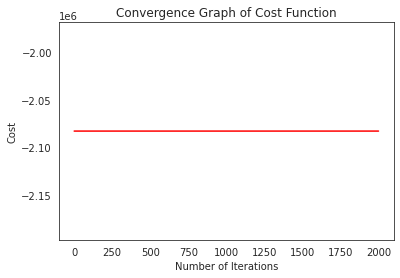

In [21]:
#Grab the data
#https://towardsdatascience.com/logistic-regression-from-scratch-with-numpy-da4cc3121ece
x = data['GrLivArea']
y = data['SalePrice']

x = (x - x.mean()) / x.std()
x = np.c_[np.ones(x.shape[0]), x] 
learning_rate = 0.01 #Step size
iterations = 2000 #No. of iterations
m = y.size #No. of data points
np.random.seed(123) #Set the seed
theta = np.random.rand(2) #Pick some random values to start with


#GRADIENT DESCENT

def gradient_descent(X, y, theta, learning_rate, iterations):
    past_thetas = [theta]
    m = len(y)
    cost_history = np.zeros((iterations,1))

    for i in range(iterations):
        theta = theta - (learning_rate/m) * (X.T @ (sigmoid(X @ theta) - y)) 
        past_thetas.append(theta)
        
        cost_history[i] = compute_cost(X, y, theta)

    return (cost_history, past_thetas)


#Pass the relevant variables to the function and get the new values back...
initial_cost = compute_cost(x, y, theta)
(past_costs, past_thetas) = gradient_descent(x, y, theta, learning_rate, iterations)

plt.figure()
sns.set_style('white')
plt.plot(range(len(past_costs)), past_costs, 'r')
plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()
#Animation

#Set the plot up,
fig = plt.figure()
ax = plt.axes()
plt.title('Sale Price vs Living Area')
plt.xlabel('Living Area in square feet (normalised)')
plt.ylabel('Sale Price ($)')
plt.scatter(x[:,1], y, color='red')
line, = ax.plot([], [], lw=2)
annotation = ax.text(-1, 700000, '')
annotation.set_animated(True)
plt.close()

#Generate the animation data,
def init():
    line.set_data([], [])
    annotation.set_text('')
    return line, annotation

# animation function.  This is called sequentially
def animate(i):
    x = np.linspace(-5, 20, 1000)
    y = past_thetas[i][1]*x + past_thetas[i][0]
    line.set_data(x, y)
    annotation.set_text('Cost = %.2f e10' % (past_costs[i]/10000000000))
    return line, annotation

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=300, interval=0, blit=True)

anim.save('animation.gif', writer='imagemagick', fps = 30)


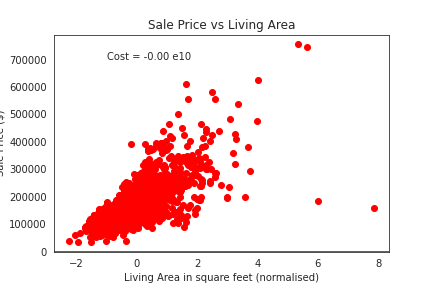

In [22]:
#Display the animation...
import io
import base64
from IPython.display import HTML

filename = 'animation.gif'

video = io.open(filename, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<img src="data:image/gif;base64,{0}" type="gif" />'''.format(encoded.decode('ascii')))

## Tensorflow implementation

Epoch: 0050 cost= 0.358360678 W= 0.54605615 b= -1.3312643
Epoch: 0100 cost= 0.325861752 W= 0.52842396 b= -1.2044183
Epoch: 0150 cost= 0.297116280 W= 0.5118408 b= -1.0851212
Epoch: 0200 cost= 0.271689415 W= 0.4962439 b= -0.97291774
Epoch: 0250 cost= 0.249198303 W= 0.48157442 b= -0.86738706
Epoch: 0300 cost= 0.229303896 W= 0.46777734 b= -0.76813173
Epoch: 0350 cost= 0.211706921 W= 0.454801 b= -0.6747803
Epoch: 0400 cost= 0.196141735 W= 0.44259614 b= -0.58698004
Epoch: 0450 cost= 0.182374269 W= 0.43111748 b= -0.50440323
Epoch: 0500 cost= 0.170196608 W= 0.42032135 b= -0.426737
Epoch: 0550 cost= 0.159425244 W= 0.41016734 b= -0.3536898
Epoch: 0600 cost= 0.149897948 W= 0.40061742 b= -0.2849877
Epoch: 0650 cost= 0.141470939 W= 0.3916352 b= -0.22037098
Epoch: 0700 cost= 0.134017289 W= 0.38318732 b= -0.15959747
Epoch: 0750 cost= 0.127424598 W= 0.3752419 b= -0.102438614
Epoch: 0800 cost= 0.121593431 W= 0.36776903 b= -0.048679095
Epoch: 0850 cost= 0.116435848 W= 0.3607405 b= 0.0018831405
Epoch: 09

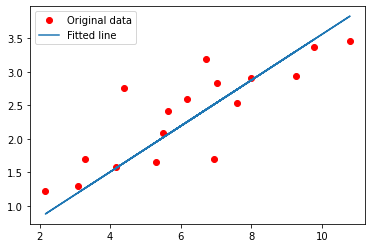

Testing... (Mean square loss Comparison)
Testing cost= 0.09114929
Absolute mean square loss difference: 0.013121612


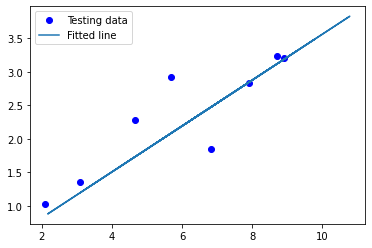

In [39]:
from __future__ import print_function
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from sklearn import datasets
import matplotlib.pyplot as plt
rng = numpy.random

# Parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50

# Training Data
x_train = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
y_train = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = x_train.shape[0]

# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
#  Note, minimize() knows to modify W and b because Variable objects are trainable=True by default
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

# Start training
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(x_train, y_train):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        # Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: x_train, Y:y_train})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: x_train, Y: y_train})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    # Graphic display
    plt.plot(x_train, y_train, 'ro', label='Original data')
    plt.plot(x_train, sess.run(W) * x_train + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

    # Testing example, as requested (Issue #2)
    test_X = numpy.asarray([6.83, 4.668, 8.9, 7.91, 5.7, 8.7, 3.1, 2.1])
    test_Y = numpy.asarray([1.84, 2.273, 3.2, 2.831, 2.92, 3.24, 1.35, 1.03])

    print("Testing... (Mean square loss Comparison)")
    testing_cost = sess.run(
        tf.reduce_sum(tf.pow(pred - Y, 2)) / (2 * test_X.shape[0]),
        feed_dict={X: test_X, Y: test_Y})  # same function as cost above
    print("Testing cost=", testing_cost)
    print("Absolute mean square loss difference:", abs(
        training_cost - testing_cost))

    plt.plot(test_X, test_Y, 'bo', label='Testing data')
    plt.plot(x_train, sess.run(W) * x_train + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

## Pytorch Implementation

Epoch [5/60], Loss: 27.9299
Epoch [10/60], Loss: 11.4159
Epoch [15/60], Loss: 4.7259
Epoch [20/60], Loss: 2.0156
Epoch [25/60], Loss: 0.9176
Epoch [30/60], Loss: 0.4728
Epoch [35/60], Loss: 0.2926
Epoch [40/60], Loss: 0.2196
Epoch [45/60], Loss: 0.1900
Epoch [50/60], Loss: 0.1781
Epoch [55/60], Loss: 0.1732
Epoch [60/60], Loss: 0.1712


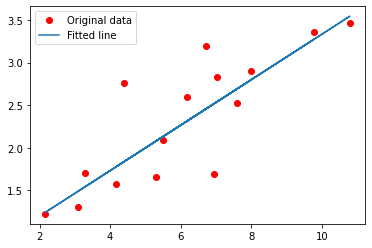

In [41]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt


# Hyper-parameters
input_size = 1
output_size = 1
num_epochs = 60
learning_rate = 0.001

# Toy dataset
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

# Linear regression model
model = nn.Linear(input_size, output_size)

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

# Train the model
for epoch in range(num_epochs):
    # Convert numpy arrays to torch tensors
    inputs = torch.from_numpy(x_train)
    targets = torch.from_numpy(y_train)

    # Forward pass
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 5 == 0:
        print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

# Plot the graph
predicted = model(torch.from_numpy(x_train)).detach().numpy()
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()
plt.show()